# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

In this project, we will see the movement of Ethereum volume on coingecko site, from time to time. By the end of this project we will need to be able to see its movement through graph visualization. 

What we will scrap from the website are all data that containing the movement of the Ethereum. There are dates that shown the Ethereum movement, the market cap, which gives us information about how much the value of the Ethereum on the market. the next one is the volume in which told us about how much is the Ethereum that moves within the given time. after that we have open and close, are the data that gives us perspectives on how much the price when its open, and close during the given time, on the market. 

This project can be used for predicting the data move in the next future. 

PS. this project is being conducted for educational purpose at algoritma data science class only

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

##Requirements
- Beatifulsoup
- pandas
- matplotlib
- seaborn
- plotly
- nbformat (>=4.2.0)

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

as we need to find the value directly, we will need to find the head of data group which directly leads to the data without getting columns name, which is in this case is the `tbody`

In [4]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-01
  </th>
  <td class="text-center">
   $160,462,955,554
  </td>
  <td class="text-center">
   $11,849,125,784
  </td>
  <td class="text-center">
   $1,329.15
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-09-30
  </th>
  <td class="text-center">
   $161,267,455,734
  </td>
  <td class="text-center">
   $11,834,328,252
  </td>
  <td class="te


so basically, to do the loop, we need to be able to find 2 row length as those five data divided into 2 parts (th for the `date` & td for the `market cap`, `volume`, `open`, and `close`).

In [5]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

31

In [6]:
row2 = table.find_all('td', attrs={'class':'text-center'})
row_length2 = len(row2)
row_length2

124

now, since the data are divided into two parts, we will do the first loop for the `date` per se. for the second part, we will do the loop for the rest of data columns. since the cell count is moving horizontally, each column will get the data in 4th step. hence, we will **add the start** based on python count (zero-based index) to **0,1,2,3** for **market cap, volume, open, and close, respectively**, as well as the step for every loop is **4**.

In [7]:
date = []
market_cap = []
volume = []
open = []
close = []

for i in range(0, row_length):
    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    date.append(Date)   

for i in range(0, row_length2,4):
    Market_Cap = table.find_all('td', attrs={'class':'text-center'})[i].text
    Market_Cap = Market_Cap.strip()
    market_cap.append(Market_Cap)

for i in range(1, row_length2,4):
    volumee = table.find_all('td', attrs={'class':'text-center'})[i].text
    volumee = volumee.strip()
    volume.append(volumee)

for i in range(2, row_length2,4):
    openn = table.find_all('td', attrs={'class':'text-center'})[i].text
    openn = openn.strip()
    open.append(openn)

for i in range(3, row_length2,4):
    closee = table.find_all('td', attrs={'class':'text-center'})[i].text
    closee = closee.strip()
    close.append(closee)

## Creating data frame & Data wrangling

we will now be assigning every result of loops into a df and put a name for every loop we've got. 

In [93]:
import pandas as pd

df = pd.DataFrame({
    'Date': date,
    'Market Cap': market_cap,
    'Volume' : volume,
    'Open' : open,
    'Close' : close
}, columns=['Date', 'Market Cap', 'Volume', 'Open', 'Close'])
df.head()

,Date,Market Cap,Volume,Open,Close
0,2022-10-01,"$160,462,955,554","$11,849,125,784","$1,329.15",N/A
1,2022-09-30,"$161,267,455,734","$11,834,328,252","$1,335.74","$1,329.15"
2,2022-09-29,"$161,716,193,676","$16,571,161,476","$1,340.02","$1,335.74"
3,2022-09-28,"$160,800,122,125","$16,685,874,856","$1,331.15","$1,340.02"
4,2022-09-27,"$160,767,471,778","$15,270,197,376","$1,335.12","$1,331.15"


As the task ask us to only show the movement of **Ethereum volume**, we will now only be taking 2 data column, which are the `Date` and `Volume`

In [92]:
df_dv = df[['Date', 'Volume']]
df_dv.head()

,Date,Volume
0,2022-10-01,"$11,849,125,784"
1,2022-09-30,"$11,834,328,252"
2,2022-09-29,"$16,571,161,476"
3,2022-09-28,"$16,685,874,856"
4,2022-09-27,"$15,270,197,376"


Now, we will be removing the `$` and the `,` sign by incorporating a function

In [12]:
def delete_dollar(x):
  for i in x:
    xx =  i.split('$')
    return int(xx[1].replace(',',''))

In [13]:
df_dv['Volume'] = df_dv[['Volume']].apply(delete_dollar,axis=1)

/var/folders/cv/n1dgpdd15vl9c0x7f3_4kbyw0000gn/T/ipykernel_22350/443765963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dv['Volume'] = df_dv[['Volume']].apply(delete_dollar,axis=1)


before diving into visualization, we need to import the `matplotlib` beforehand (a must) and set the styling (optional)

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

we reverse the table using `[::-1]` so the data will show from the oldest to the latest, and also setting the `date` column as the index

In [30]:
df_dv = df_dv[::-1].set_index('Date')

and initial the visualization using .plot

<AxesSubplot:xlabel='Date'>

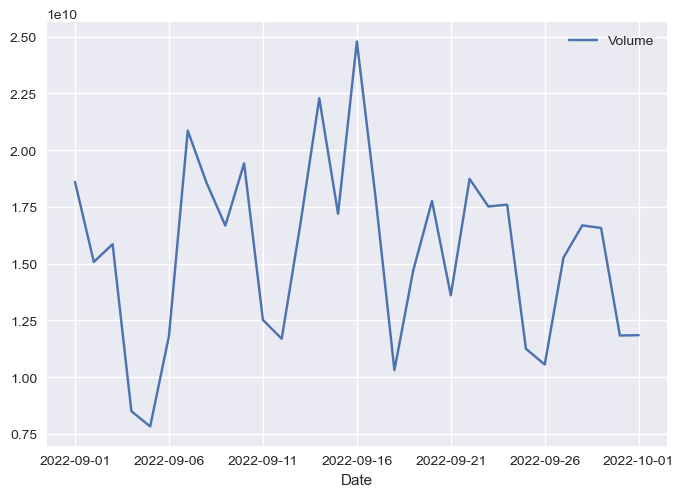

In [31]:
df_dv.plot()

we can improve the visualization by **giving it a title** as well as naming the **y axis as Volume Ethereum Traded**

<AxesSubplot:title={'center':'        Volume Ethereum diperdagangkan 31 Agustus 2022 - 30 September 2022'}, xlabel='Date', ylabel='Volume Ethereum Traded'>

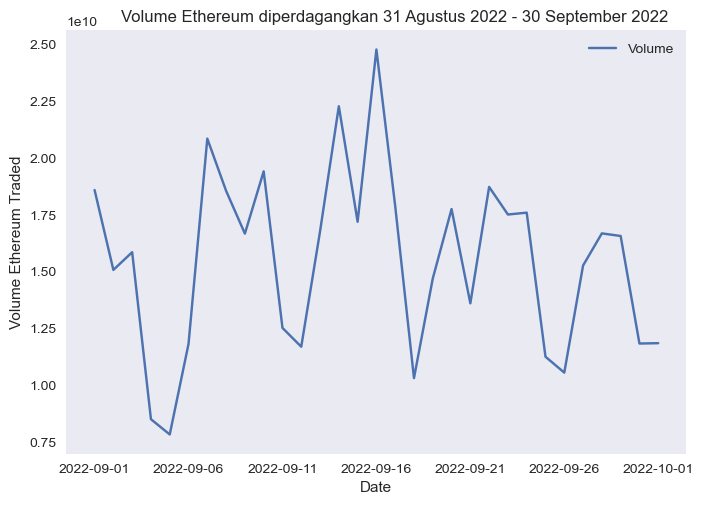

In [62]:
df_dv.plot(kind='line',
        ylabel='Volume Ethereum Traded',
        xlabel='Date',
        title='\
        Volume Ethereum diperdagangkan 31 Agustus 2022 - 30 September 2022',
        grid=False,
        rot=0)

as the day shown in the previous visualization less comprehensible, we will now creating a new one so its easy to understand. But beforehand, we need to **install** and **import** the `seaborn` for the start

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

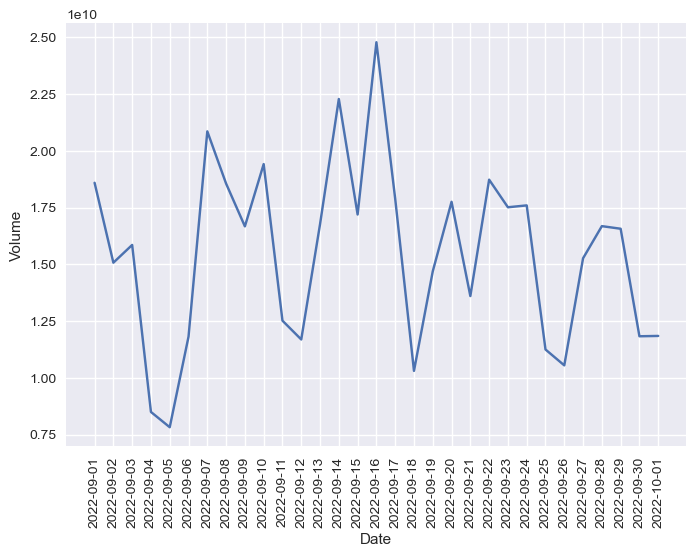

In [58]:
import seaborn as sns
sns.lineplot(data=df_dv, x="Date", y="Volume")
plt.xticks(rotation=90)

for the last touch, we will be making the volume more intelligible. first thing first, we will be needed to **import the plotly.express** and also **install the nbformat** to do this, specifically the `nbformat>=4.2.0`

In [21]:
import plotly.express as px

In [89]:
fig = px.line(df_dv,markers=True, width=1000,facet_col_wrap=2, title='Ethereum Volume Traded Between 31 Agustus 2022 - 30 September 2022')
fig.update_xaxes(
    dtick="D1",showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(title_font=dict(size=23)) 
fig.show()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

The movement of Ethereum Volume between **September 1 2022** to **October 1 2022** (Note that the date differs from the task given which should start at the **1st Jan 2020** to **30th June 2021** is because the date given in the task is not accessible. When its trying to access, the page shows an error) is quite volatile, which means that the involvement on how much is traded quite dependable each day. The volume traded between given time span `reach the lowest at September 5th` with the volume traded at 7.8B. On the contrary, at `September 17th` the volume reaches its peak with volume traded at 24.7B. There is also the **mean** for the volume traded is at 15B. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.